<a href="https://colab.research.google.com/github/parulmehndiratta9-cyber/parul/blob/main/DriveSphere_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connection to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original Image Name: lindau_000038_000019_leftImg8bit.png
JSON Data: {'imgHeight': 1024, 'imgWidth': 2048, 'objects': [{'label': 'road', 'polygon': [[40, 459], [23, 431], [56, 404], [596, 428], [921, 444], [1539, 467], [2048, 657], [2048, 1024], [0, 1024], [0, 775], [53, 760], [101, 728], [135, 690], [160, 598], [149, 533], [100, 488]]}, {'label': 'building', 'polygon': [[79, 265], [79, 318], [74, 319], [71, 320], [70, 351], [74, 351], [75, 350], [73, 390], [72, 408], [696, 445], [903, 453], [913, 448], [912, 413], [910, 407], [918, 44], [920, 0], [218, 0], [220, 15], [220, 30], [220, 38], [223, 43], [230, 46], [225, 55], [222, 69], [220, 74], [218, 78], [213, 91], [210, 104], [212, 173], [199, 190], [174, 206], [160, 209], [151, 210], [144, 212], [141, 218], [141, 227], [134, 234], [124, 258], [119, 261], [100, 262]]}, {'label': 'building', 'polygon': [[910, 68], [907, 451], [1969, 443], [1988, 0], [1429, 0], [927, 0], [906, 0]]}, {'label': 'vegetation', 'polygon': [[1155, 344], [1147

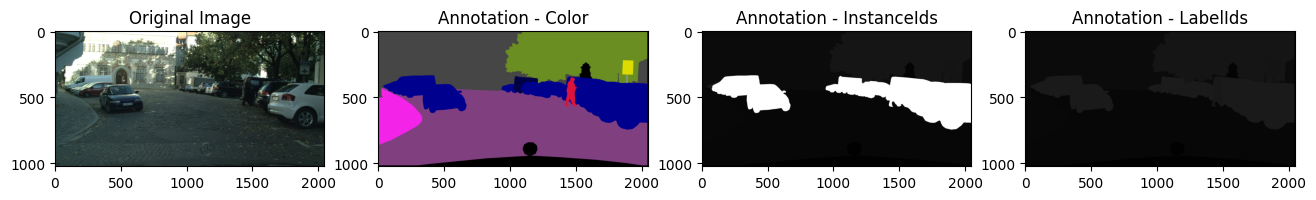

Original Image Name: lindau_000026_000019_leftImg8bit.png
JSON Data: {'imgHeight': 1024, 'imgWidth': 2048, 'objects': [{'label': 'ground', 'polygon': [[560, 545], [1404, 550], [1378, 532], [1344, 508], [1326, 493], [1138, 487], [1075, 487], [885, 483], [822, 483], [643, 487]]}, {'label': 'building', 'polygon': [[1684, 439], [1661, 493], [1288, 505], [965, 508], [636, 485], [553, 483], [92, 410], [0, 320], [0, 0], [2048, 0], [2048, 388], [2024, 405], [1964, 437]]}, {'label': 'road', 'polygon': [[496, 503], [578, 500], [612, 480], [1659, 490], [2033, 427], [2048, 425], [2048, 927], [2048, 1024], [0, 1024], [0, 557], [21, 564], [372, 563], [511, 533]]}, {'label': 'vegetation', 'polygon': [[1563, 460], [1554, 443], [1555, 421], [1554, 391], [1558, 333], [1558, 304], [1558, 289], [1559, 268], [1562, 253], [1561, 238], [1560, 225], [1560, 213], [1561, 204], [1574, 194], [1587, 185], [1594, 178], [1599, 170], [1615, 155], [1617, 143], [1624, 138], [1633, 136], [1635, 141], [1637, 133], [1640,

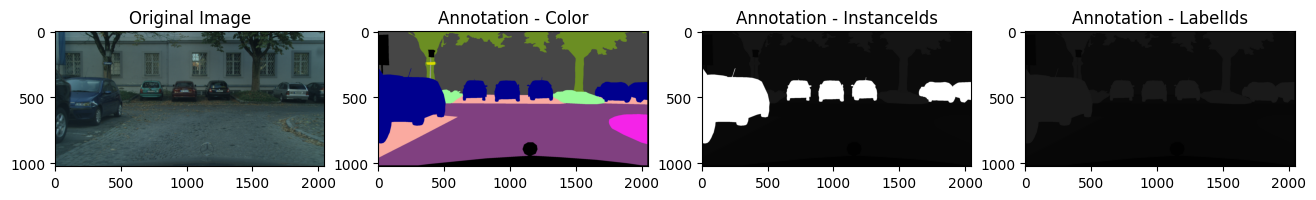

Original Image Name: lindau_000021_000019_leftImg8bit.png
JSON Data: {'imgHeight': 1024, 'imgWidth': 2048, 'objects': [{'label': 'sky', 'polygon': [[1311, 0], [1318, 128], [1263, 102], [1252, 0]]}, {'label': 'sidewalk', 'polygon': [[1362, 491], [1097, 566], [611, 1024], [0, 1024], [0, 355], [1373, 373]]}, {'label': 'sidewalk', 'polygon': [[1376, 496], [1327, 509], [1276, 540], [1263, 566], [1853, 1024], [2048, 1024], [2046, 630]]}, {'label': 'building', 'polygon': [[1270, 83], [1269, 0], [0, 1], [1, 616], [598, 624], [726, 564], [736, 563], [814, 531], [834, 528], [842, 520], [960, 515], [979, 513], [1062, 488], [1165, 488], [1226, 488], [1267, 485], [1288, 480], [1327, 481], [1353, 482], [1352, 498], [1342, 509], [1340, 520], [1335, 529], [1357, 532], [1374, 548], [1389, 552], [1391, 557], [1460, 592], [1598, 647], [1672, 671], [1793, 712], [2047, 800], [2047, 1], [1299, 1], [1298, 28], [1289, 52], [1294, 57], [1296, 90], [1294, 96], [1290, 99]]}, {'label': 'road', 'polygon': [[620, 8

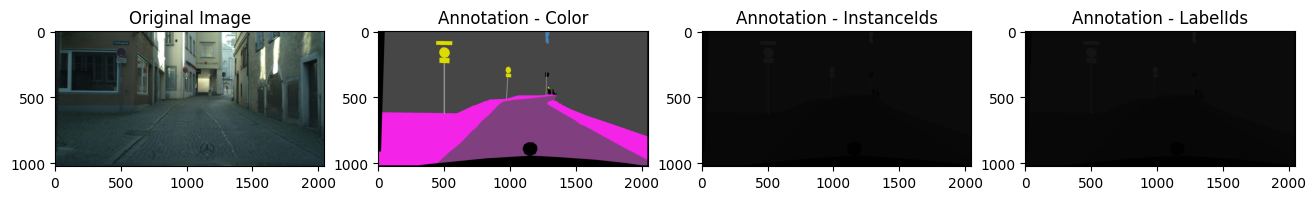

In [ ]:
import os
from PIL import Image, ImageDraw
from torchvision import transforms
import matplotlib.pyplot as plt
import json

class CustomDataset:
    def __init__(self, original_folder, annotation_folder, transform=None):
        self.original_folder = original_folder
        self.annotation_folder = annotation_folder
        self.transform = transform

        # Getting list of annotation files
        self.annotation_files = self._get_annotation_files()

    def _get_annotation_files(self):
        annotation_files = []
        for root, _, files in os.walk(self.annotation_folder):
            for file in files:
                if file.endswith("_labelIds.png"):
                    annotation_files.append(os.path.join(root, file))
        return annotation_files

    def _get_original_image_path(self, annotation_path):
        image_name = os.path.basename(annotation_path).split('_gtFine')[0] + "_leftImg8bit.png"
        image_folder = os.path.dirname(annotation_path).replace(self.annotation_folder, self.original_folder)
        return os.path.join(image_folder, image_name)

    def _get_json_file(self, annotation_path):
        json_name = os.path.basename(annotation_path).replace('_labelIds.png', '_polygons.json')
        json_folder = os.path.dirname(annotation_path)
        return os.path.join(json_folder, json_name)

    def _load_json_data(self, json_file):
        with open(json_file, 'r') as file:
            data = json.load(file)
        return data

    def __len__(self):
        return len(self.annotation_files)

    def __getitem__(self, idx):
        annotation_path = self.annotation_files[idx]

        # Loading original image
        original_image_path = self._get_original_image_path(annotation_path)
        original_image = Image.open(original_image_path).convert("RGB")

        # Loading annotation images
        annotation_files = []
        for suffix in ["_color.png", "_instanceIds.png", "_labelIds.png"]:
            annotation_file = annotation_path.replace("_labelIds.png", suffix)
            annotation_files.append(Image.open(annotation_file).convert("RGB"))

        # Loading JSON file
        json_file = self._get_json_file(annotation_path)
        json_data = self._load_json_data(json_file)

        # Applying transformations if provided
        if self.transform:
            original_image = self.transform(original_image)
            annotation_files = [self.transform(annotation) for annotation in annotation_files]

        return original_image, annotation_files, json_data, os.path.basename(original_image_path), os.path.basename(annotation_path)


# Defining paths for original and annotated images
original_folder = "/content/drive/MyDrive/AIP/leftImg8bit_trainvaltest/leftImg8bit"
annotated_folder = "/content/drive/MyDrive/AIP/gtFine_trainvaltest/gtFine"

# Initializing dataset
dataset = CustomDataset(original_folder, annotated_folder, transform=transforms.ToTensor())

# Showing the first few samples
num_samples_to_show = 3
for i in range(num_samples_to_show):
    original_image, annotations, json_data, original_image_name, annotation_image_name = dataset[i]

    # Printing the original image name
    print(f"Original Image Name: {original_image_name}")

    # Printing the annotated image names
    annotation_names = [anno.split("_gtFine")[1] for anno in annotation_image_name.split("_labelIds.png, ")]
    # print(f"Annotated Image Names: {', '.join(annotation_names)}")

    # Displaying original image
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(original_image.permute(1, 2, 0))
    plt.title("Original Image")

    # Displaying annotated images
    for j, annotation in enumerate(annotations):
        plt.subplot(1, 4, j+2)
        plt.imshow(annotation.permute(1, 2, 0))
        if j == 0:
            plt.title("Annotation - Color")
        elif j == 1:
            plt.title("Annotation - InstanceIds")
        else:
            plt.title("Annotation - LabelIds")

    # Printing JSON data
    print("JSON Data:", json_data)

    plt.show()


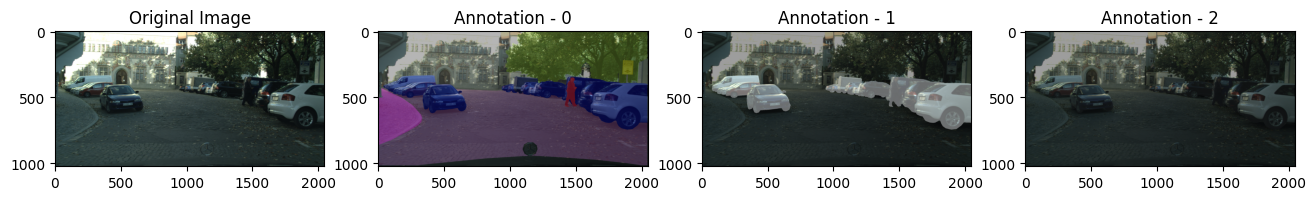

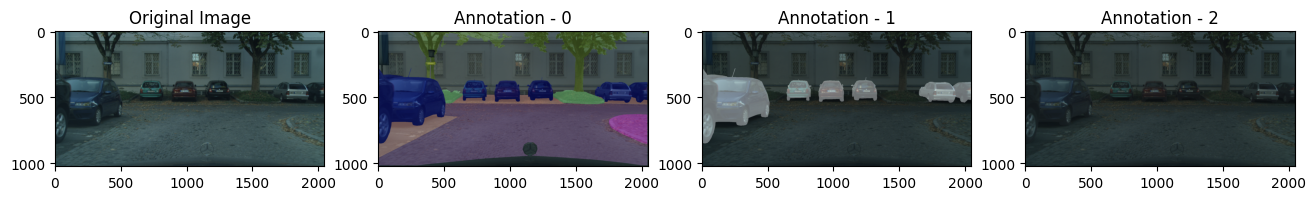

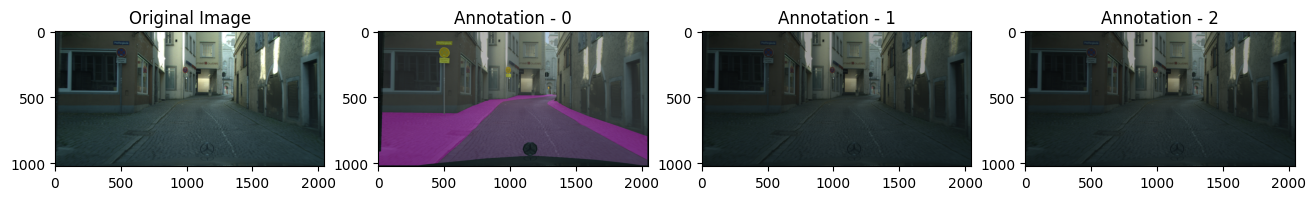

In [ ]:
 # Function to overlay annotations on the original image
def overlay_annotations(original_image, annotations):
    plt.figure(figsize=(16, 6))

    # Plotting original image
    plt.subplot(1, len(annotations) + 1, 1)
    plt.imshow(original_image.permute(1, 2, 0))
    plt.title("Original Image")

    # Plotting each annotation overlaid on original image
    for i, annotation in enumerate(annotations):
        plt.subplot(1, len(annotations) + 1, i + 2)
        plt.imshow(original_image.permute(1, 2, 0))
        plt.imshow(annotation.permute(1, 2, 0), alpha=0.4)  # Overlaying with transparency
        plt.title(f"Annotation - {i}")

    plt.show()

# Assuming we have original_image and annotations loaded from our dataset
for i in range(num_samples_to_show):
    original_image, annotations, _, _, _ = dataset[i]

    # Overlaying annotations on original image
    overlay_annotations(original_image, annotations)



Segmentation Masks

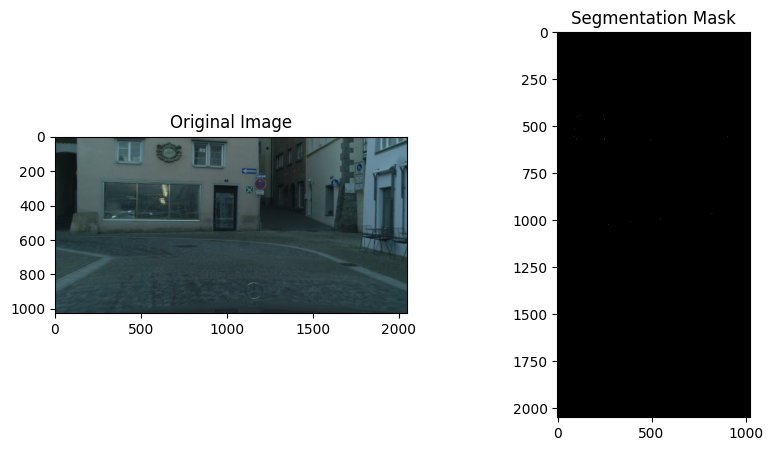

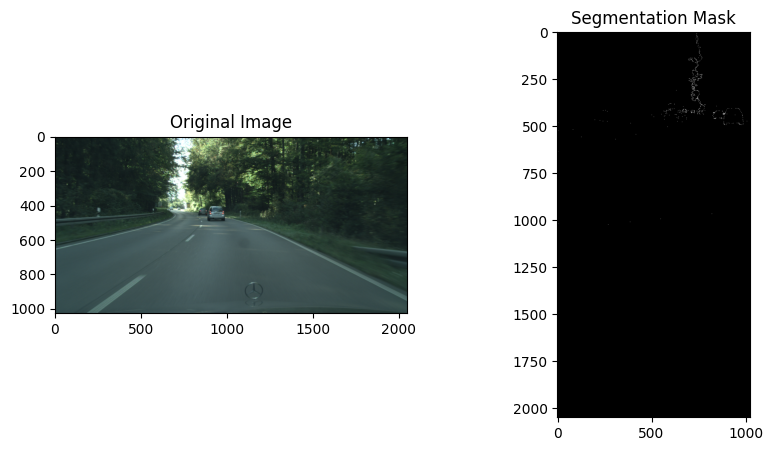

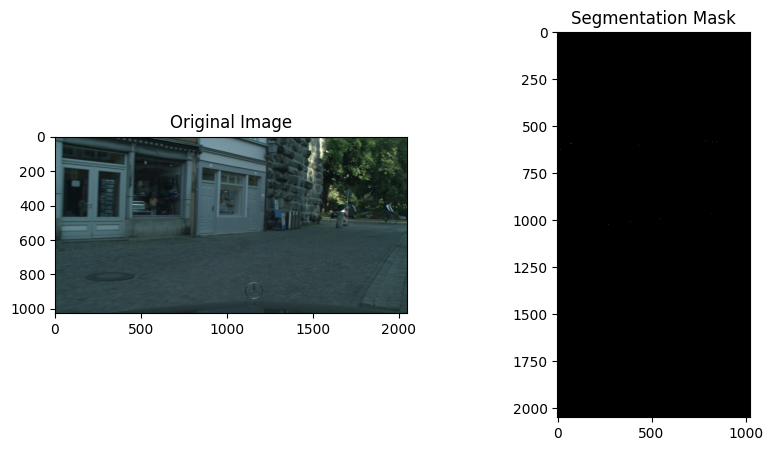

In [ ]:
import numpy as np

class CustomDataset:
    def __init__(self, original_folder, annotation_folder, transform=None):
        self.original_folder = original_folder
        self.annotation_folder = annotation_folder
        self.transform = transform

        # Getting list of annotation files
        self.annotation_files = self._get_annotation_files()

    def _get_annotation_files(self):
        annotation_files = []
        for root, _, files in os.walk(self.annotation_folder):
            for file in files:
                if file.endswith("_polygons.json"):  # Changed to polygons.json
                    annotation_files.append(os.path.join(root, file))
        return annotation_files

    def _get_original_image_path(self, annotation_path):
        image_name = os.path.basename(annotation_path).split('_gtFine_polygons.json')[0] + "_leftImg8bit.png"  # Changed to _gtFine_polygons.json
        image_folder = os.path.dirname(annotation_path).replace(self.annotation_folder, self.original_folder)
        return os.path.join(image_folder, image_name)

    def _create_mask_from_polygons(self, image_size, polygons):
        mask = Image.new("L", image_size, 0)
        draw = ImageDraw.Draw(mask)
        for obj in polygons['objects']:
            for polygon in obj.get('polygon', []):
                if len(polygon) == 2:  # Handling single coordinate (point)
                    point = (polygon[0], polygon[1])
                    draw.rectangle([point, (point[0] + 1, point[1] + 1)], outline=1, fill=1)
                elif len(polygon) > 2:  # Checking if polygon has at least three points
                    draw.polygon(polygon, outline=1, fill=1)
                else:
                    print(f"Skipping invalid polygon data: {polygon} - coordinate list must contain at least 2 coordinates")
        return mask



    def __len__(self):
        return len(self.annotation_files)

    def __getitem__(self, idx):
        annotation_path = self.annotation_files[idx]

        # Loading original image
        original_image_path = self._get_original_image_path(annotation_path)
        original_image = Image.open(original_image_path).convert("RGB")

        # Loading annotation data from JSON file
        with open(annotation_path, 'r') as f:
            polygons_data = json.load(f)

        # Creating segmentation mask from polygon data
        image_size = original_image.size[::-1]  # PIL size is (width, height)
        mask = self._create_mask_from_polygons(image_size, polygons_data)

        # Applying transformations if provided
        if self.transform:
            original_image = self.transform(original_image)
            mask = self.transform(mask)

        return original_image, mask

# Defining paths for original and annotated images
original_folder = "/content/drive/MyDrive/AIP/leftImg8bit_trainvaltest/leftImg8bit"
annotated_folder = "/content/drive/MyDrive/AIP/gtFine_trainvaltest/gtFine"

# Initializing dataset
dataset = CustomDataset(original_folder, annotated_folder, transform=transforms.ToTensor())

# Showing the first few samples
num_samples_to_show = 3
for i in range(num_samples_to_show):
    original_image, mask = dataset[i]

    # Displaying original image and mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image.permute(1, 2, 0))
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(mask[0], cmap='gray')
    plt.title("Segmentation Mask")
    plt.show()


Data Augmentation Transform

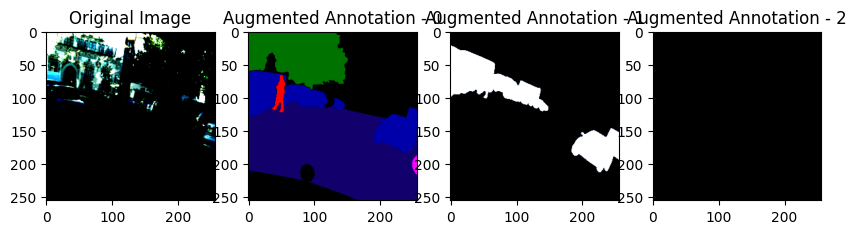

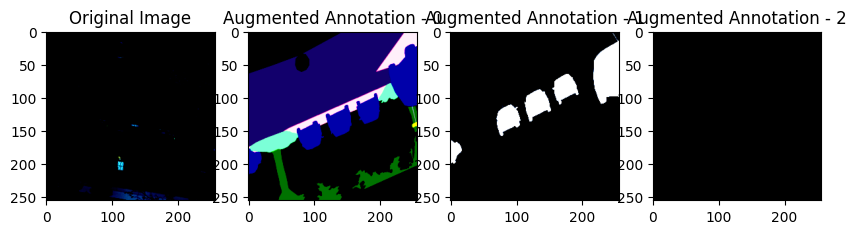

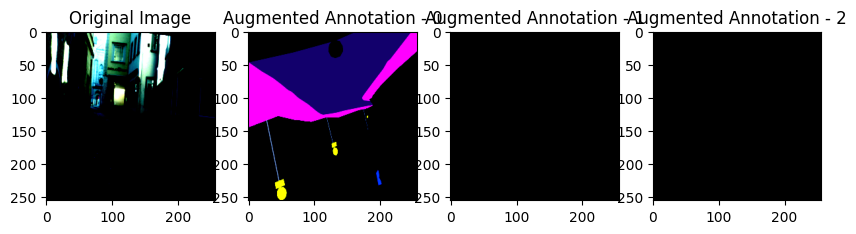

In [ ]:
import os
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import json

class CustomDataset:
    def __init__(self, original_folder, annotation_folder, transform=None):
        self.original_folder = original_folder
        self.annotation_folder = annotation_folder
        self.transform = transform

        # Getting list of annotation files
        self.annotation_files = self._get_annotation_files()

    def _get_annotation_files(self):
        annotation_files = []
        for root, _, files in os.walk(self.annotation_folder):
            for file in files:
                if file.endswith("_labelIds.png"):
                    annotation_files.append(os.path.join(root, file))
        return annotation_files

    def _get_original_image_path(self, annotation_path):
        image_name = os.path.basename(annotation_path).split('_gtFine')[0] + "_leftImg8bit.png"
        image_folder = os.path.dirname(annotation_path).replace(self.annotation_folder, self.original_folder)
        return os.path.join(image_folder, image_name)

    def _get_json_file(self, annotation_path):
        json_name = os.path.basename(annotation_path).replace('_labelIds.png', '_polygons.json')
        json_folder = os.path.dirname(annotation_path)
        return os.path.join(json_folder, json_name)

    def _load_json_data(self, json_file):
        with open(json_file, 'r') as file:
            data = json.load(file)
        return data

    def __len__(self):
        return len(self.annotation_files)

    def __getitem__(self, idx):
        annotation_path = self.annotation_files[idx]

        # Loading original image
        original_image_path = self._get_original_image_path(annotation_path)
        original_image = Image.open(original_image_path).convert("RGB")

        # Loading annotation images
        annotation_files = []
        for suffix in ["_color.png", "_instanceIds.png", "_labelIds.png"]:
            annotation_file = annotation_path.replace("_labelIds.png", suffix)
            annotation_files.append(Image.open(annotation_file).convert("RGB"))

        # Loading JSON file
        json_file = self._get_json_file(annotation_path)
        json_data = self._load_json_data(json_file)

        # Applying transformations if provided
        if self.transform:
            # Applying the same transformation to both the original image and annotation images
            original_image = self.transform(original_image)
            for i in range(len(annotation_files)):
                annotation_files[i] = self.transform(annotation_files[i])

        return original_image, annotation_files, json_data, os.path.basename(original_image_path), os.path.basename(annotation_path)


# Defining data augmentation transformations
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Initializing dataset with data augmentation transformations
dataset = CustomDataset(original_folder, annotated_folder, transform=data_transform)

# Visualizing augmented images
num_samples_to_show = 3
for i in range(num_samples_to_show):
    original_image, annotations, _, _, _ = dataset[i]

    # Displaying original and augmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, len(annotations) + 1, 1)
    plt.imshow(original_image.permute(1, 2, 0))
    plt.title("Original Image")
    for j, annotation in enumerate(annotations):
        plt.subplot(1, len(annotations) + 1, j + 2)
        plt.imshow(annotation.permute(1, 2, 0))
        plt.title(f"Augmented Annotation - {j}")
    plt.show()

Defining U-Net Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.transforms import ToTensor, Resize, Compose
from PIL import Image
from torch.utils.data import random_split
from torchvision.transforms import RandomHorizontalFlip, RandomRotation
from tqdm import tqdm

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

In [ ]:
def forward(self, x):
    return self.conv(x)


In [ ]:

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.down_conv1 = DoubleConv(in_channels, 64)
        self.down_conv2 = DoubleConv(64, 128)
        self.down_conv3 = DoubleConv(128, 256)
        self.down_conv4 = DoubleConv(256, 512)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.up_transpose1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.up_conv1 = DoubleConv(512, 256)
        self.up_transpose2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.up_conv2 = DoubleConv(256, 128)
        self.up_transpose3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.up_conv3 = DoubleConv(128, 64)

        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1 = self.down_conv1(x)
        x2 = self.maxpool(x1)
        x3 = self.down_conv2(x2)
        x4 = self.maxpool(x3)
        x5 = self.down_conv3(x4)
        x6 = self.maxpool(x5)
        x7 = self.down_conv4(x6)

        # Decoder
        x = self.up_transpose1(x7)
        x = torch.cat([x, x5], dim=1)
        x = self.up_conv1(x)
        x = self.up_transpose2(x)
        x = torch.cat([x, x3], dim=1)
        x = self.up_conv2(x)
        x = self.up_transpose3(x)
        x = torch.cat([x, x1], dim=1)
        x = self.up_conv3(x)

        # Output
        x = self.out(x)
        return x

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None, train_percent=0.1):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform
        self.train_percent = train_percent

        # Getting the list of image files
        self.image_files = []
        for root, dirs, files in os.walk(image_folder):
            for file in files:
                if file.endswith(".jpg") or file.endswith(".png"):
                    self.image_files.append(os.path.join(root, file))

        num_train_samples = int(len(self.image_files) * self.train_percent)
        self.train_files, _ = random_split(self.image_files, [num_train_samples, len(self.image_files) - num_train_samples])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        mask_name = os.path.basename(img_path).split('.')[0] + '_mask.jpg'
        mask_path = os.path.join(self.mask_folder, mask_name)

        image = Image.open(img_path).convert('RGB')

        if os.path.exists(mask_path):
            mask = Image.open(mask_path).convert('L')
        else:
            # If the mask file does not exist, creating a dummy mask
            mask = Image.new("L", image.size)  # Creating a black mask with the same size as the image

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    RandomHorizontalFlip(),  # Applying random horizontal flips
    RandomRotation(degrees=15),  # Applying random rotations up to 15 degrees
    transforms.ToTensor()
])

# Defining the paths to your datasets
original_folder = "/content/drive/MyDrive/AIP/leftImg8bit_trainvaltest/leftImg8bit/train"
annotated_folder = "/content/drive/MyDrive/AIP/gtFine_trainvaltest/gtFine/train"

# Creating dataset and data loader
dataset = CustomDataset(original_folder, annotated_folder, transform=transform, train_percent=0.1)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(in_channels=3, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

In [ ]:
# Defining the number of epochs
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

In [ ]:
# Defining the batch size
batch_size = 32

# Defining the paths to your validation dataset folders
val_original_folder = "/content/drive/MyDrive/AIP/leftImg8bit_trainvaltest/leftImg8bit/val"
val_annotated_folder = "/content/drive/MyDrive/AIP/gtFine_trainvaltest/gtFine/val"

# Getting the list of filenames in the validation dataset folders
val_original_filenames = os.listdir(val_original_folder)
val_annotated_filenames = os.listdir(val_annotated_folder)

# Selecting a single file path from the lists
val_original_filepath = os.path.join(val_original_folder, val_original_filenames[0])
val_annotated_filepath = os.path.join(val_annotated_folder, val_annotated_filenames[0])

# Defining your validation dataset and transform
val_dataset = CustomDataset(val_original_filepath, val_annotated_filepath, transform)

# Defining your data loader for validation
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

def compute_iou(pred_mask, true_mask):
    intersection = np.logical_and(true_mask, pred_mask).sum()
    union = np.logical_or(true_mask, pred_mask).sum()
    iou = (intersection + 1e-10) / (union + 1e-10)  # Adding a small epsilon to avoid division by zero
    return iou

model = model.to(device)

def validate_model(val_loader, model, criterion):
    model.eval()  # Setting the model to evaluation mode
    val_loss = 0.0
    iou = 0.0
    num_samples = 0

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)

            # Converting outputs to binary masks (0s and 1s)
            pred_masks = torch.argmax(outputs, dim=1)  # Assuming we are using a classification output
            pred_masks = pred_masks.cpu().numpy()
            true_masks = masks.cpu().numpy()

            # Computing IoU for each sample in the batch
            for pred_mask, true_mask in zip(pred_masks, true_masks):
                iou += compute_iou(pred_mask, true_mask)
                num_samples += 1

    val_loss /= len(val_loader.dataset)
    iou /= num_samples

    print(f'Validation Loss: {val_loss:.4f}, Mean IoU: {iou:.4f}')
    return val_loss, iou

validate_model(val_loader, model, criterion)


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
image_path = "/content/drive/MyDrive/AIP/leftImg8bit_trainvaltest/leftImg8bit/test/berlin/berlin_000000_000019_leftImg8bit.png"
original_image = Image.open(image_path).convert("RGB")

# Defining preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocessing the image
input_tensor = preprocess(original_image).unsqueeze(0)

# Moving the input tensor to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_tensor = input_tensor.to(device)

# Passing the preprocessed image through the model
model.eval()  # Setting the model to evaluation mode
with torch.no_grad():
    output_tensor = model(input_tensor)

# Post-processing the segmentation output
segmented_image = (output_tensor.squeeze().cpu().numpy() > 0.5).astype(np.uint8) * 255
segmented_image = Image.fromarray(segmented_image, mode='L')

# Displaying the original and segmented images using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(segmented_image, cmap='gray')
axs[1].set_title('Segmented Image')
axs[1].axis('off')
plt.show()

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st

torch.save(model.state_dict(), 'unet_model.pth')

In [ ]:
# model = UNet(in_channels=3, out_channels=1)
model.load_state_dict(torch.load('unet_model.pth'))
model.eval()

In [ ]:
%%writefile drivesphere.py

import streamlit as st
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import numpy as np

# Define the UNet model architecture
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.down_conv1 = DoubleConv(in_channels, 64)
        self.down_conv2 = DoubleConv(64, 128)
        self.down_conv3 = DoubleConv(128, 256)
        self.down_conv4 = DoubleConv(256, 512)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.up_transpose1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.up_conv1 = DoubleConv(512, 256)
        self.up_transpose2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.up_conv2 = DoubleConv(256, 128)
        self.up_transpose3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.up_conv3 = DoubleConv(128, 64)

        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1 = self.down_conv1(x)
        x2 = self.maxpool(x1)
        x3 = self.down_conv2(x2)
        x4 = self.maxpool(x3)
        x5 = self.down_conv3(x4)
        x6 = self.maxpool(x5)
        x7 = self.down_conv4(x6)

        # Decoder
        x = self.up_transpose1(x7)
        x = torch.cat([x, x5], dim=1)
        x = self.up_conv1(x)
        x = self.up_transpose2(x)
        x = torch.cat([x, x3], dim=1)
        x = self.up_conv2(x)
        x = self.up_transpose3(x)
        x = torch.cat([x, x1], dim=1)
        x = self.up_conv3(x)

        # Output
        x = self.out(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained UNet model
model = UNet(in_channels=3, out_channels=1)
model.load_state_dict(torch.load('unet_model.pth', map_location=device))
model.eval()

def perform_segmentation(image, model):
    print("Input Image Size:", image.size)

    # Preprocess the image
    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = preprocess(image).unsqueeze(0)
    print("Preprocessed Image Shape:", input_tensor.shape)

    # Perform segmentation
    with torch.no_grad():
        output_tensor = model(input_tensor)

    print("Output Tensor Shape:", output_tensor.shape)

    # Post-process the segmentation output
    segmented_image = (output_tensor.squeeze().cpu().numpy() > 0.5).astype(np.uint8) * 255
    segmented_image = Image.fromarray(segmented_image, mode='L')

    print("Segmented Image Size:", segmented_image.size)

    return segmented_image

def main():
    st.title("Semantic Segmentation Web App")

    uploaded_image = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

    if uploaded_image is not None:
        # Display the original image
        original_image = Image.open(uploaded_image)
        st.image(original_image, caption="Original Image", use_column_width=True)

        # Perform segmentation
        segmented_image = perform_segmentation(original_image, model)

        # Display the segmented image
        st.image(segmented_image, caption="Segmented Image", use_column_width=True)


if __name__ == "__main__":
    main()


In [ ]:
!streamlit run drivesphere.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.235.72:8501

npx: installed 22 in 6.489s
your url is: https://lemon-poems-invent.loca.lt
  Stopping...
^C
